In [2]:
import matplotlib.pyplot as plt
import keras
from keras import layers,models
import tensorflow as tf
import numpy as np

In [3]:
IMG_SIZE=120
BATCH_SIZE=32

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant_disease/train/cherry/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 3509 files belonging to 2 classes.


In [5]:
class_names=dataset.class_names
print(class_names)

['Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy']


<Figure size 720x720 with 0 Axes>

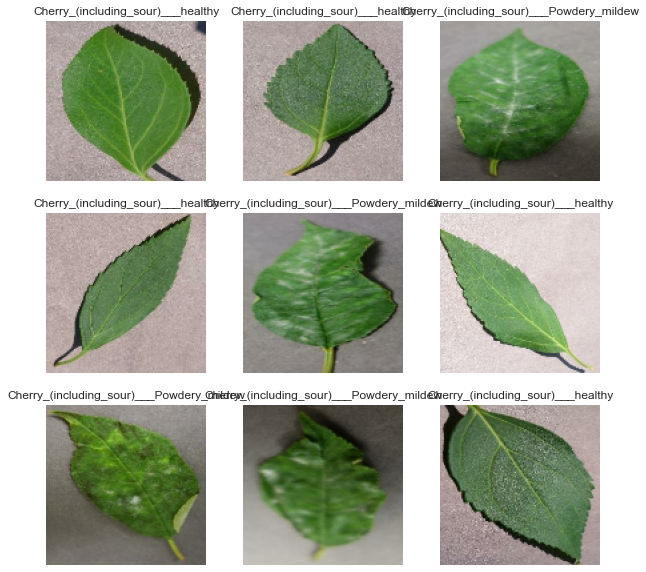

In [6]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [7]:
print(len(dataset))


110


### Train Test Split

In [8]:
def test_train_split(dataset,train_per=0.8,valid_per=0.2):
    n=len(dataset)
    train_len=int(n*train_per)
    train_ds=dataset.take(train_len)
    data=dataset.skip(train_len)
#     test_len=int(n*test_per)
#     test_ds=data.take(test_len)
#     valid_ds=data.skip(test_len)
    return train_ds,data

In [9]:
train_ds,valid_ds=test_train_split(dataset,0.8,0.2)

In [10]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant_disease/valid/cherry/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 877 files belonging to 2 classes.


In [11]:
print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))

88
28
22


In [12]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
vaidl_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Augmentation

In [13]:
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [14]:
input_shape=(BATCH_SIZE,IMG_SIZE,IMG_SIZE,3)
n_classes=len(dataset.class_names)
print(n_classes)

2


In [15]:

model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),

    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
  
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu',padding='same'),
    
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
    
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
]
)

In [16]:
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (32, 120, 120, 3)         0         
                                                                 
 rescaling (Rescaling)       (32, 120, 120, 3)         0         
                                                                 
 sequential (Sequential)     (32, 120, 120, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 120, 120, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 60, 60, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 60, 60, 64)          18496     
                                                      

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=valid_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
88/88 [==============================] - 66s 706ms/step - loss: 0.3875 - accuracy: 0.8040 - val_loss: 0.1635 - val_accuracy: 0.9452
Epoch 2/30
88/88 [==============================] - 60s 679ms/step - loss: 0.1613 - accuracy: 0.9453 - val_loss: 0.1035 - val_accuracy: 0.9683
Epoch 3/30
88/88 [==============================] - 57s 652ms/step - loss: 0.0992 - accuracy: 0.9670 - val_loss: 0.0399 - val_accuracy: 0.9827
Epoch 4/30
88/88 [==============================] - 59s 670ms/step - loss: 0.0720 - accuracy: 0.9783 - val_loss: 0.0192 - val_accuracy: 0.9957
Epoch 5/30
88/88 [==============================] - 60s 678ms/step - loss: 0.0423 - accuracy: 0.9883 - val_loss: 0.0109 - val_accuracy: 0.9942
Epoch 6/30
88/88 [==============================] - 61s 694ms/step - loss: 0.0538 - accuracy: 0.9886 - val_loss: 0.0088 - val_accuracy: 0.9986
Epoch 7/30
88/88 [==============================] - 59s 667ms/step - loss: 0.0377 - accuracy: 0.9901 - val_loss: 0.0054 - val_accuracy: 0.9986

In [20]:
print(model.evaluate(test_ds))
print(model.evaluate(valid_ds))
print(model.evaluate(train_ds))

28/28 [==============================] - 3s 101ms/step - loss: 0.0041 - accuracy: 0.9989
[0.004102066159248352, 0.9988597631454468]
22/22 [==============================] - 4s 108ms/step - loss: 0.0057 - accuracy: 0.9986
[0.005680338945239782, 0.9985569715499878]
88/88 [==============================] - 8s 89ms/step - loss: 0.0033 - accuracy: 0.9986
[0.0033327313140034676, 0.9985795617103577]


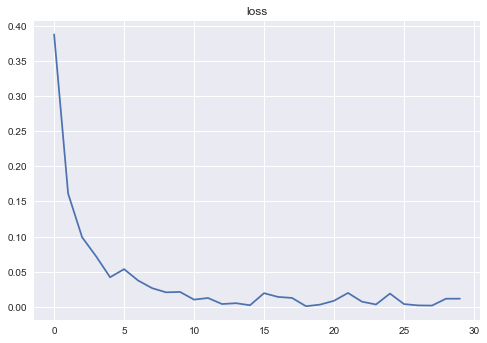

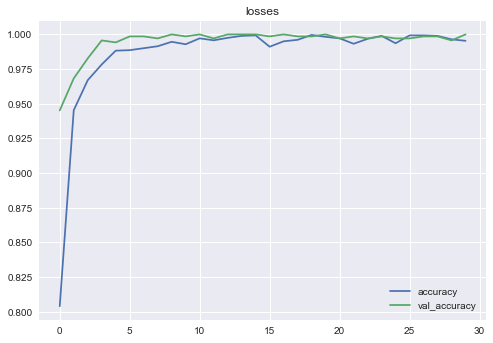

In [21]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('losses')
plt.show()


model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
]
)

In [22]:
def predict(img):
    img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    arr=model.predict(img)
    ind=np.argmax(arr)
    return dataset.class_names[ind]

Cherry_(including_sour)___Powdery_mildew


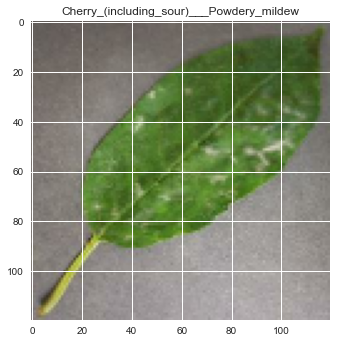

Cherry_(including_sour)___healthy


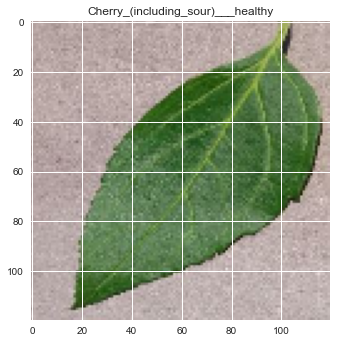

Cherry_(including_sour)___Powdery_mildew


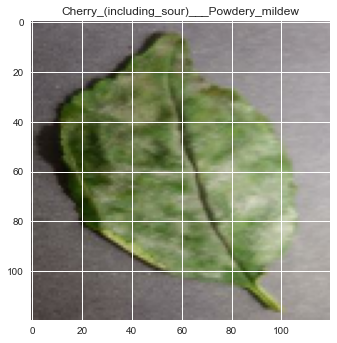

Cherry_(including_sour)___healthy


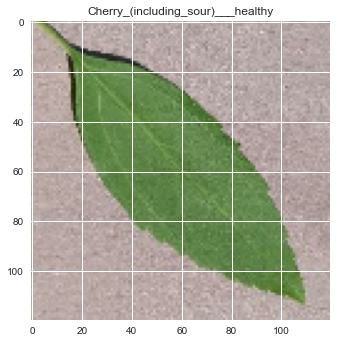

Cherry_(including_sour)___healthy


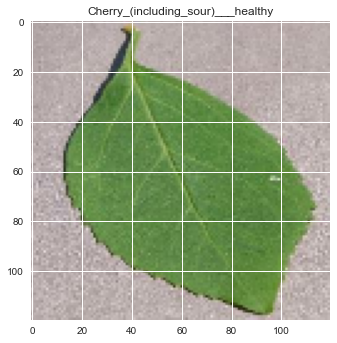

Cherry_(including_sour)___healthy


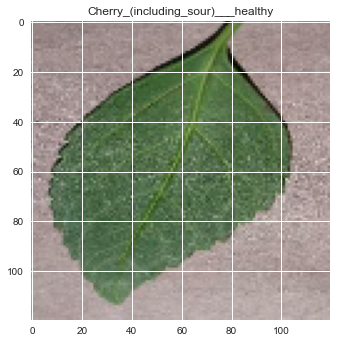

Cherry_(including_sour)___Powdery_mildew


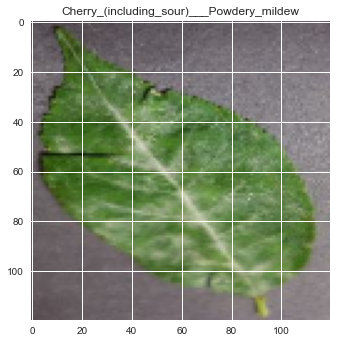

Cherry_(including_sour)___Powdery_mildew


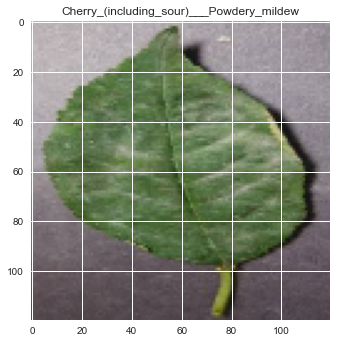

Cherry_(including_sour)___healthy


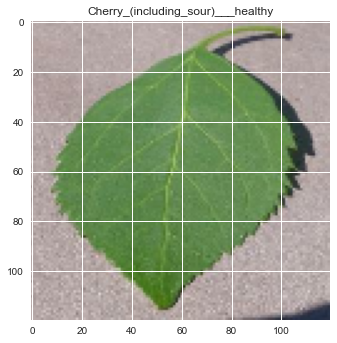

Cherry_(including_sour)___Powdery_mildew


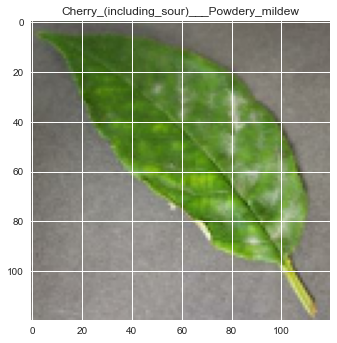

Cherry_(including_sour)___healthy


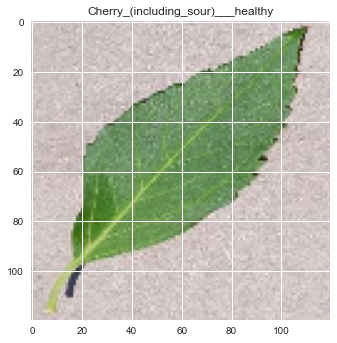

Cherry_(including_sour)___healthy


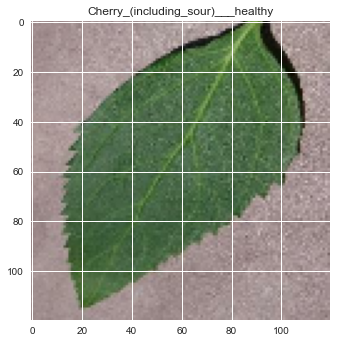

Cherry_(including_sour)___healthy


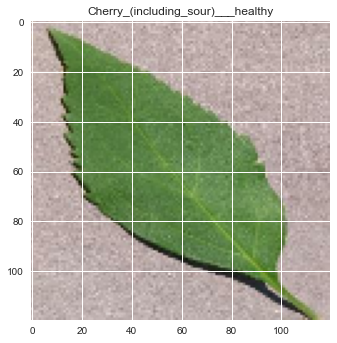

Cherry_(including_sour)___healthy


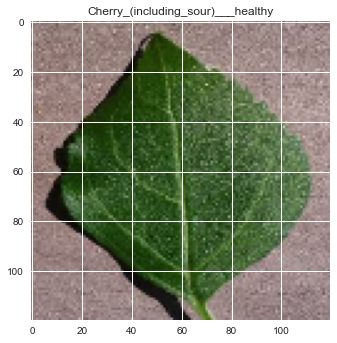

Cherry_(including_sour)___healthy


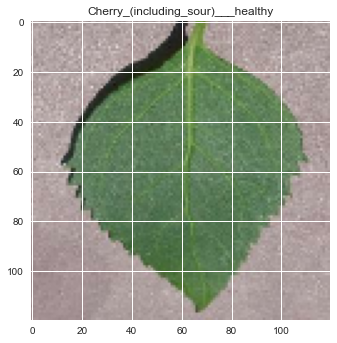

Cherry_(including_sour)___healthy


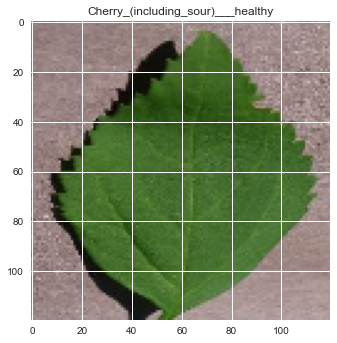

Cherry_(including_sour)___Powdery_mildew


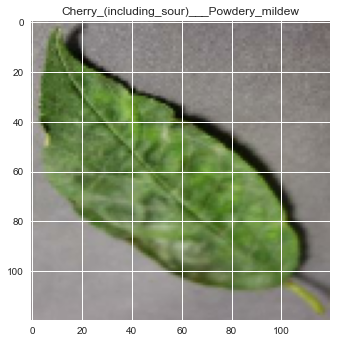

Cherry_(including_sour)___healthy


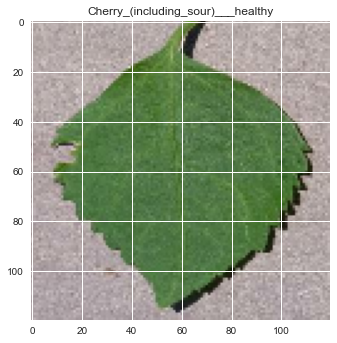

Cherry_(including_sour)___Powdery_mildew


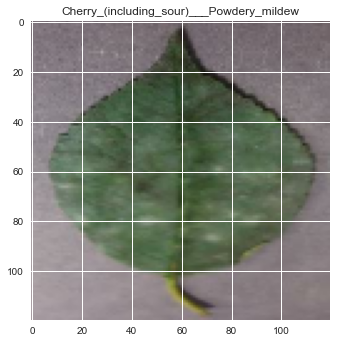

Cherry_(including_sour)___healthy


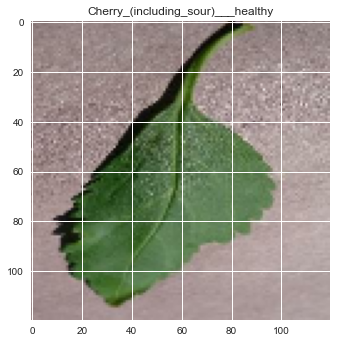

Cherry_(including_sour)___healthy


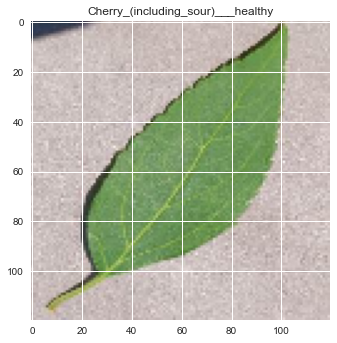

Cherry_(including_sour)___Powdery_mildew


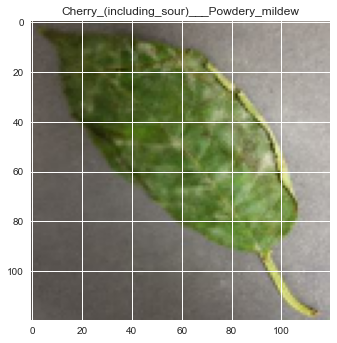

Cherry_(including_sour)___Powdery_mildew


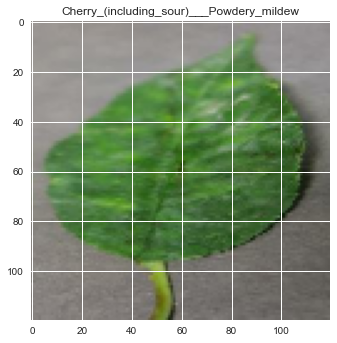

Cherry_(including_sour)___Powdery_mildew


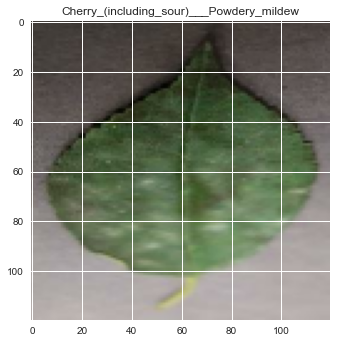

Cherry_(including_sour)___healthy


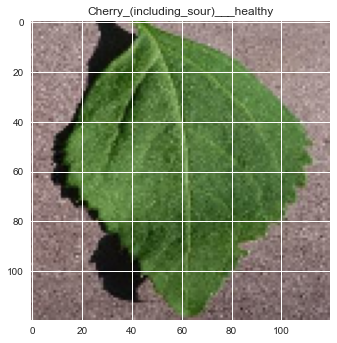

Cherry_(including_sour)___healthy


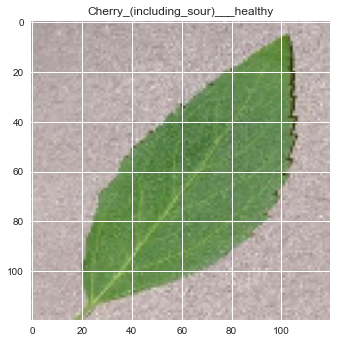

Cherry_(including_sour)___Powdery_mildew


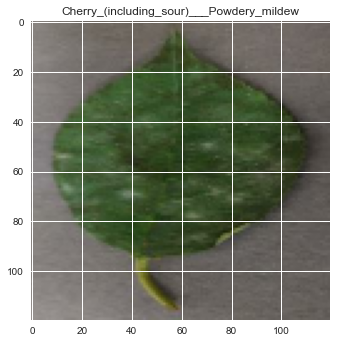

Cherry_(including_sour)___Powdery_mildew


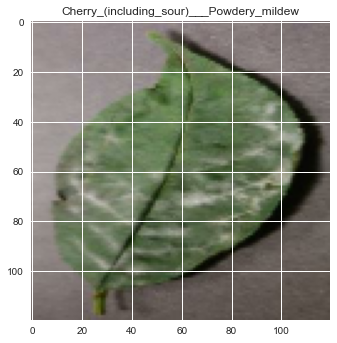

Cherry_(including_sour)___healthy


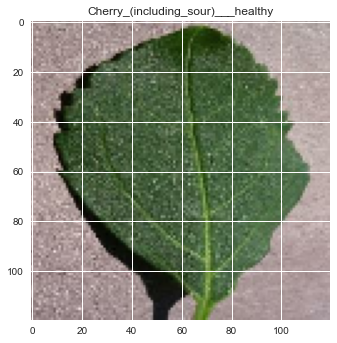

Cherry_(including_sour)___Powdery_mildew


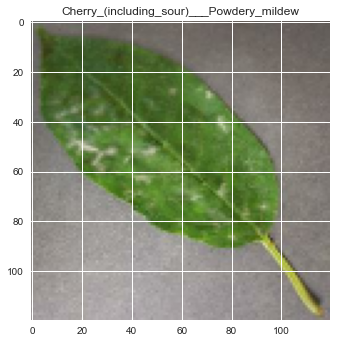

Cherry_(including_sour)___Powdery_mildew


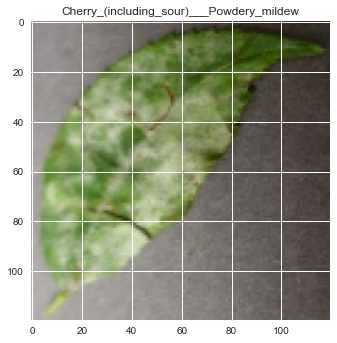

Cherry_(including_sour)___healthy


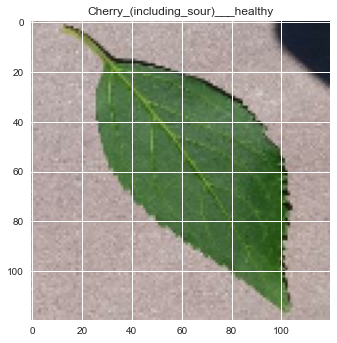

In [23]:
for images,label in test_ds.take(1):
    for i in range(len(images)):
#         print(x.shape)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        print(predict(images[i].numpy()))
        plt.show()

        
    
    

In [24]:
from keras.models import model_from_json

In [25]:
model_json = model.to_json()
with open("models/model_cherry.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("models/model_cherry.h5")

In [26]:
json_file = open('models/model_cherry.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/model_cherry.h5")

In [27]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [28]:
print(type(loaded_model))

<class 'keras.engine.sequential.Sequential'>


In [29]:
loaded_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
print(loaded_model.evaluate(test_ds))
print(loaded_model.evaluate(valid_ds))
print(loaded_model.evaluate(train_ds))

28/28 [==============================] - 3s 94ms/step - loss: 0.0041 - accuracy: 0.9989
[0.004102066159248352, 0.9988597631454468]
22/22 [==============================] - 3s 97ms/step - loss: 7.7092e-04 - accuracy: 1.0000
[0.0007709160563535988, 1.0]
88/88 [==============================] - 8s 96ms/step - loss: 0.0033 - accuracy: 0.9986
[0.0033327313140034676, 0.9985795617103577]
